In [2]:
def turnintotable(content):
    try1=pd.DataFrame()
    tryall=pd.DataFrame()
    for i in range(len(context)):
        line=context[i].strip()
        if 'ending' in line:
            fielddate=line.split()[-2].split(',')[0]
        if 'Route' in line:
            fieldroute=line.split(',')[1]
        if 'Direction' in line:
            fieldirection=line.split(',')[1]
        if 'Stop' in line:
            fieldstop=line.split(',')[1]
        if line.strip().split(',')[0].isdigit():#this is wonderful!!!!
            if context[i+1].strip()=='': #len(context[i+1])==0:
                #print(context[i])
                fields=line.split(',')
                a=pd.DataFrame([fields],columns=['Vehicle','Job','Scheduled','Actual','Difference'])
                try1=try1.append(a,ignore_index=True)#!!!you need to assign the append df to sth or it will be discard
                try1['date']=fielddate
                try1['route']=fieldroute
                try1['Direction']=fieldirection
                try1['stop']=fieldstop
                #print(try1)
                tryall=tryall.append(try1,ignore_index=True)
                try1=pd.DataFrame()
            else:
                fields=line.split(',')
                a=pd.DataFrame([fields],columns=['Vehicle','Job','Scheduled','Actual','Difference'])
                #print(a)
                try1=try1.append(a)#!!!you need to assign the append df to sth or it will be discard
    return tryall

In [3]:
#from stackflow
from datetime import datetime, time as datetime_time, timedelta

def time_diff(start, end):
    start=datetime.strptime(start, '%H:%M:%S')
    end=datetime.strptime(end, '%H:%M:%S')
    if isinstance(start, datetime_time): # convert to datetime
        assert isinstance(end, datetime_time)
        start, end = [datetime.combine(datetime.min, t) for t in [start, end]]
    if start <= end: # e.g., 10:33:26-11:15:49
        return end - start
    else: # end < start e.g., 23:55:00-00:25:00
        end += timedelta(1) # +day
        assert end > start
        return end - start


In [4]:
import glob
path = "H:/HRao/Bus_headway_file/dupont circle/*.csv"
table=pd.DataFrame()
tableall=pd.DataFrame()
for fname in glob.glob(path):
    
    table=pd.DataFrame()
    print(fname)
    context=open(fname,'r').readlines()
    
    table=turnintotable(context)
    print('done')
    tableall=tableall.append(table,ignore_index=True)

H:/HRao/Bus_headway_file/dupont circle\710du.csv
done
H:/HRao/Bus_headway_file/dupont circle\711du.csv
done
H:/HRao/Bus_headway_file/dupont circle\712du.csv
done
H:/HRao/Bus_headway_file/dupont circle\713du.csv
done
H:/HRao/Bus_headway_file/dupont circle\714du.csv
done
H:/HRao/Bus_headway_file/dupont circle\715du.csv
done
H:/HRao/Bus_headway_file/dupont circle\716du.csv
done
H:/HRao/Bus_headway_file/dupont circle\717du.csv
done
H:/HRao/Bus_headway_file/dupont circle\718du.csv
done
H:/HRao/Bus_headway_file/dupont circle\719du.csv
done
H:/HRao/Bus_headway_file/dupont circle\71du.csv
done
H:/HRao/Bus_headway_file/dupont circle\720du.csv
done
H:/HRao/Bus_headway_file/dupont circle\721du.csv
done
H:/HRao/Bus_headway_file/dupont circle\722du.csv
done
H:/HRao/Bus_headway_file/dupont circle\723du.csv
done
H:/HRao/Bus_headway_file/dupont circle\724du.csv
done
H:/HRao/Bus_headway_file/dupont circle\725du.csv
done
H:/HRao/Bus_headway_file/dupont circle\726du.csv
done
H:/HRao/Bus_headway_file/dupo

AssertionError: 5 columns passed, passed data had 10 columns

In [21]:
sorttry=tableall.sort_values(['stop','Direction','date','Scheduled']).reset_index(drop=True)
# so the difference can be calculated right

In [22]:
sorttry['diffsch']=''
for i in range(len(sorttry)-1):
    i=i+1
    sorttry['diffsch'][i]=time_diff(sorttry['Scheduled'][i-1],sorttry['Scheduled'][i])

In [23]:
sortact=sorttry.sort_values(['stop','Direction','date','Actual']).reset_index(drop=True)

In [24]:
sortact['diffact']=''
sortact['diffsch_min']=''
for i in range(len(sortact)-1):
    i=i+1
    sortact['diffact'][i]=time_diff(sortact['Actual'][i-1],sortact['Actual'][i])
    sortact['diffsch_min'][i]=sortact['diffsch'][i].seconds/60

In [25]:
sortact.head()

,Vehicle,Job,Scheduled,Actual,Difference,date,route,Direction,stop,diffsch,diffact,diffsch_min
0,1142,605,00:10:00,00:04:40,00:05:20,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),,,
1,1137,603,00:30:00,00:30:25,-00:00:25,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:25:45,20
2,1141,601,00:40:00,00:40:52,-00:00:52,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:10:00,0:10:27,10
3,1142,605,01:00:00,01:01:41,-00:01:41,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:20:49,20
4,1137,603,01:20:00,01:22:25,-00:02:25,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:20:44,20


In [38]:
for i in range(len(sortact['Scheduled'])):
    sortact['Scheduled'][i]=datetime.strptime(sortact['Scheduled'][i], '%H:%M:%S').time()

In [36]:
sortact.loc[sortact['date']=='01']

,Vehicle,Job,Scheduled,Actual,Difference,date,route,Direction,stop,diffsch,diffact,diffsch_min
0,1142,605,00:10:00,00:04:40,00:05:20,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),,,
1,1137,603,00:30:00,00:30:25,-00:00:25,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:25:45,20
2,1141,601,00:40:00,00:40:52,-00:00:52,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:10:00,0:10:27,10
3,1142,605,01:00:00,01:01:41,-00:01:41,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:20:49,20
4,1137,603,01:20:00,01:22:25,-00:02:25,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:20:44,20
5,1141,601,01:30:00,01:31:55,-00:01:55,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:10:00,0:09:30,10
6,1140,602,01:40:00,01:40:40,-00:00:40,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:10:00,0:08:45,10
7,1142,605,01:50:00,01:51:16,-00:01:16,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:10:00,0:10:36,10
8,1137,603,02:10:00,02:12:24,-00:02:24,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:21:08,20
9,1141,601,02:20:00,02:20:55,-00:00:55,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:10:00,0:08:31,10


In [48]:
sortact['diffsch_min'][1::]=sortact['diffsch_min'][1::].apply(int)

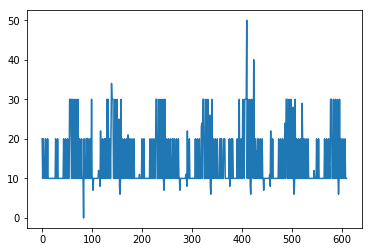

In [55]:
A=sortact[1::].loc[sortact['date']=='01']
pp.plot(range(len(A.loc[A['diffsch_min']<=50]['Scheduled'])),A.loc[A['diffsch_min']<=50]['diffsch_min'])
#pp.plot(range(len(sortact.loc[sortact['date']=='01']['Scheduled'])-1),sortact.loc[sortact['date']=='01']['diffsch_min'][1::])

In [63]:
sortact['diffact_min']=''
for i in range(len(sortact)-1):
    i=i+1
    sortact['diffact_min'][i]=round(sortact['diffact'][i].seconds/60)

#

In [64]:
sortact.head()

,Vehicle,Job,Scheduled,Actual,Difference,date,route,Direction,stop,diffsch,diffact,diffsch_min,diffact_min
0,1142,605,00:10:00,00:04:40,00:05:20,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),,,,
1,1137,603,00:30:00,00:30:25,-00:00:25,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:25:45,20,26
2,1141,601,00:40:00,00:40:52,-00:00:52,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:10:00,0:10:27,10,10
3,1142,605,01:00:00,01:01:41,-00:01:41,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:20:49,20,21
4,1137,603,01:20:00,01:22:25,-00:02:25,01,Dupont-Rosslyn,Westbound,19th St and N St (Dupont Metro),0:20:00,0:20:44,20,21


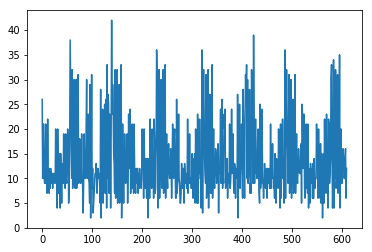

In [66]:
A=sortact[1::].loc[sortact['date']=='01']
pp.plot(range(len(A.loc[A['diffact_min']<=50]['Scheduled'])),A.loc[A['diffact_min']<=50]['diffact_min'])

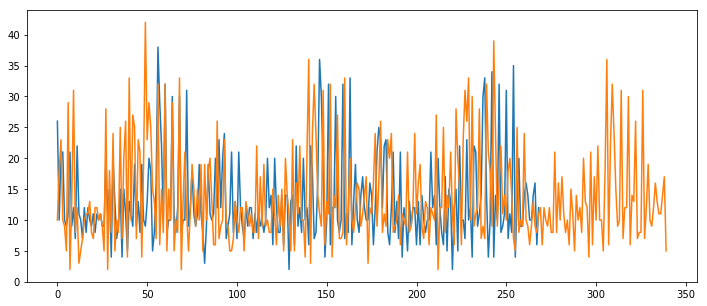

In [84]:
pp.figure(figsize=(12,5))
Aw=sortact[(sortact['date']=='01')& (sortact['Direction']=='Westbound')][1::]
pp.plot(range(len(Aw.loc[Aw['diffact_min']<=50]['Scheduled'])),Aw.loc[Aw['diffact_min']<=50]['diffact_min'])
Ae=sortact[(sortact['date']=='01')& (sortact['Direction']=='Eastbound')][1::]
pp.plot(range(len(Ae.loc[Ae['diffact_min']<=50]['Scheduled'])),Ae.loc[Ae['diffact_min']<=50]['diffact_min'])

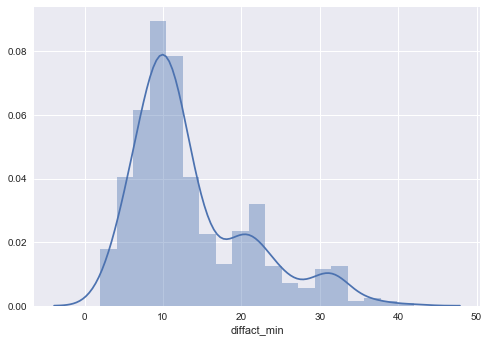

In [87]:
import seaborn
seaborn.distplot(A.loc[A['diffact_min']<=50]['diffact_min'])

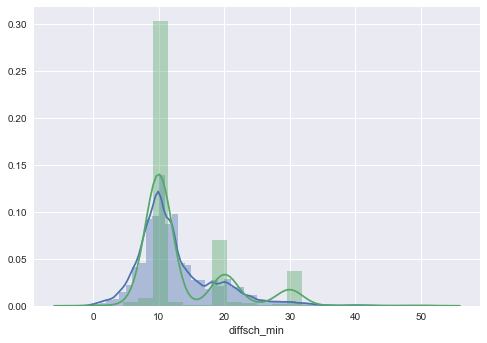

In [94]:
B=sortact[1::]
seaborn.distplot(B.loc[B['diffact_min']<=50]['diffact_min'])
seaborn.distplot(A.loc[B['diffsch_min']<=50]['diffsch_min'])
